0
1
2
3
4
5
6
7
8
9
10


<ErrorbarContainer object of 3 artists>

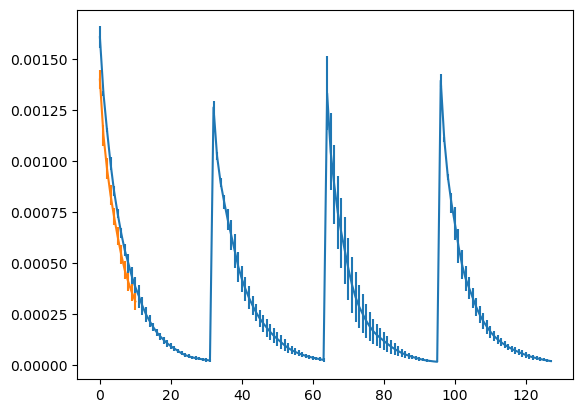

In [24]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

def Jackknifeset(datalist): #this gives Jackknife set for given sent of values
    N = len(datalist)
    Jackknife_set = []
    for i in range(N): #Jackknife
        sliced_list = datalist[:(i)] + datalist[(i+1):]
        Jackknife_set.append(np.mean(sliced_list))
    return Jackknife_set
    
def Jackknife(datalist): #for given Jackknifeset
    N = len(datalist)
    theta_bar = np.mean(datalist)
    theta_nminus_theta_bar = []
    for i in range(len(datalist)): #Jackknife
        theta_n = datalist[(i)]
        theta_nminus_theta_bar.append(np.square(theta_n-theta_bar))
    sigma_sq = ((N-1)/N)*np.sum(theta_nminus_theta_bar)
    return(theta_bar, np.sqrt(sigma_sq))


cfglist =[12000,18440]
pt2_cfgfull = []
nocfg = 0
snk_time = 10
pt2_cfg = []
for j, cfg in enumerate(cfglist):
    pt2_tree = ET.parse(f"/pscratch/sd/h/hari_8/nEDM_project_LANL/output_3pt2pt_flow/FLOWED_0p0_hadspec_Pavg_cl21_48_128_b6p3_m0p2390_m0p2050.0_18448_t28x33y36z28_t60x45y36z28_t92x33y36z28_t124x45y36z28_HP.dat_{cfg}.xml")
    pt2_root = pt2_tree.getroot()
    pt2_values = []
    for elem in pt2_root.findall(".//Shell_Point_Wilson_Mesons/elem[gamma_value='15']/momenta/elem[sink_mom_num='0']/mesprop/"):
        pt2_Num_value = elem.find("re").text
        pt2_values.append(float(pt2_Num_value))
    pt2_data = np.array(pt2_values)
    pt2_data1 = pt2_data[28-28:(28-28+(snk_time+1))]
    pt2_data2 = pt2_data[60-28:(60-28+(snk_time+1))]
    pt2_data3 = pt2_data[92-28:(92-28+(snk_time+1))]
    pt2_data4 = pt2_data[124-28:(124-28+(snk_time+1))]
    pt2_cfg.append((pt2_data1+pt2_data2+pt2_data3+pt2_data4)/4)
    pt2_cfgfull.append(pt2_data)

pt2_JK_value = []
pt2_JK_err = []
for tt in range(128):
    pt2_tau_Jackknifeset = Jackknifeset([pt2_cfgfull[i][tt] for i in range(len(pt2_cfgfull))])
    pt2_JK_value_err = Jackknife(np.array(pt2_tau_Jackknifeset))
    pt2_JK_value.append(pt2_JK_value_err[0])
    pt2_JK_err.append(pt2_JK_value_err[1])
time_pltfull = np.arange(len(pt2_JK_value))
plt.errorbar(time_pltfull, pt2_JK_value, yerr=pt2_JK_err)

pt2_JK_value1 = []
pt2_JK_err1 = []
for tt1 in range(snk_time+1):
    print(tt1)
    pt2_tau_Jackknifeset1 = Jackknifeset([pt2_cfg[i][tt1] for i in range(len(pt2_cfg))])
    pt2_JK_value_err1 = Jackknife(np.array(pt2_tau_Jackknifeset1))
    pt2_JK_value1.append(pt2_JK_value_err1[0])
    pt2_JK_err1.append(pt2_JK_value_err1[1])
time_pltfull1 = np.arange(len(pt2_JK_value1))
plt.errorbar(time_pltfull1, pt2_JK_value1, yerr=pt2_JK_err1)